# 决策树不稳定当数据发生微小变化可能会生成完全不同的树

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris=load_iris()
X=iris.data[:,2:]
y=iris.target

In [7]:
from sklearn.tree import DecisionTreeClassifier

clf=DecisionTreeClassifier(max_depth=2,random_state=666)
clf.fit(X,y)

DecisionTreeClassifier(max_depth=2, random_state=666)

In [8]:
def decision_boundary_plot(X,y,clf):
    axis_x1_min,axis_x1_max=X[:,0].min()-1,X[:,0].max()+1
    axis_x2_min,axis_x2_max=X[:,1].min()-1,X[:,1].max()+1
    x1,x2=np.meshgrid(np.arange(axis_x1_min,axis_x1_max,0.01),np.arange(axis_x2_min,axis_x2_max,0.01))
    z=clf.predict(np.c_[x1.ravel(),x2.ravel()])
    z=z.reshape(x1.shape)
    from matplotlib.colors import ListedColormap
    custom_cmap=ListedColormap(['#F5B9EF','#FFFFFF','#F9F9CB'])
    plt.contourf(x1,x2,z,cmap=custom_cmap)
    plt.scatter(X[:,0],X[:,1],c=y)

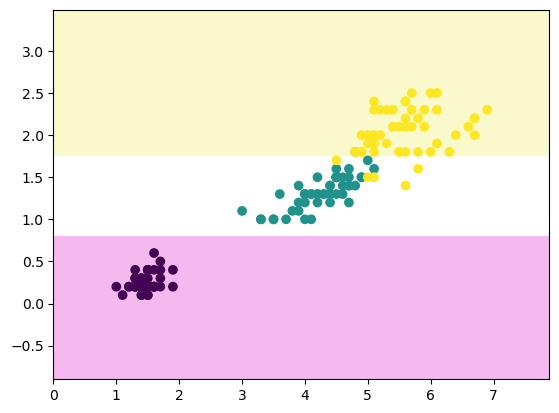

In [9]:
decision_boundary_plot(X,y,clf)

In [10]:
X[130]=[6,0.5]

In [11]:
clf.fit(X,y)

DecisionTreeClassifier(max_depth=2, random_state=666)

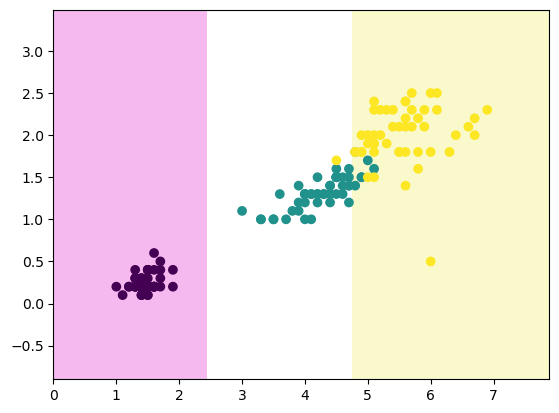

In [13]:
decision_boundary_plot(X,y,clf)#可见改一个值决策边界已经完全不同